```
Yizhou ~ 2020 8 30 6:02 pm:
I wrote the PCA algorithm and then use Sklearn for prediction.
```

1. Non recons

In [1]:
import os;
from google.colab import drive
drive.mount('/content/drive', force_remount=True);


path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation";

os.chdir(path);
from PMT_compressed_sensing_simu import Compressed_sensing_PMT as CSP;

path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/Eigen Face";
os.chdir(path);


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#plt.style.use("seaborn-ticks")

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
## convert the dataframe into np.array
df = pd.read_csv('face_data.csv');
X = df.drop('target', axis=1);
X = X.values;
y = df['target'];
y = y.values;

r = 64;
c = 64;

pmt = CSP();

In [3]:
## check the eigen_value and eigen vector
def Check_Eigen(X):
    X_mean = np.mean(X, axis = 0);
    X_centered = X - X_mean;
    S = X_centered.T.dot(X_centered) / (len(X_centered)-1);
    eigen_val, eigen_vec = np.linalg.eig(S);

    r,c = X.shape;
    n_comp = min(r,c); ## 根据PCA使用的SVD算法，sklearn返回的是样本数和特征数的较小值 n_comp
    '''    
    eigen_vec = eigen_vec[:,:n_comp];
    '''
    return eigen_val, eigen_vec, X_mean, n_comp;
    

X_train, X_test, y_train, y_test = train_test_split(X, y);
#eigen_val, eigen_vec, X_train_mean, n_component = Check_Eigen(X_train);
pca = PCA(n_components = 105).fit(X_train);
eigen_val, eigen_vec, X_train_mean = pca.explained_variance_, pca.components_.T, pca.mean_

print(eigen_val.shape)
print(eigen_vec.shape)

(105,)
(4096, 105)


In [4]:
class Strategy(object):
    def __init__(self):
        self.prop = {};

    def add_item(self, name, item):
        if name not in self.prop:
            self.prop[name] = item;
        else:
            print("Item name already exists.");
    
    def rm_item(self, name):
        if name in self.prop:
            del self.prop[name];
        else:
            print("Item name doesn't exist.")

def get_greatest(eigen_val, threshold = 0.1): ## eigen values are sorted!
    for i in range(len(eigen_val)):
        if eigen_val[i] < eigen_val[0] * 0.1:
            Break;
    return i;

In [5]:
N_iter = 10;
max_time = 7;
min_time = -1;
log_time_list = np.arange(N_iter+1) / (N_iter) * (max_time - min_time) + min_time;
time_list = 10**log_time_list;
compression_rate = 0.25;
cycles = int(compression_rate * r * c);


CS = Strategy();

random_mask = np.round(np.random.rand(cycles, (r*c)));
unit_mask = np.eye((r*c));

CS.add_item("phi", random_mask);

CS.add_item("cycles", len(CS.prop['phi'][:,0]));

CS.add_item("psi", eigen_vec.astype(float));
CS.add_item("n_photon", 1e6);
CS.add_item("measure", []);
CS.add_item("recons",[]);
CS.add_item("error", []);
CS.add_item("time_list", time_list);

CS.add_item("data", X_test);

CS.add_item("true_coef", (CS.prop['data'] - X_train_mean).dot(CS.prop['psi']));

CS.add_item("recon_coef", []);

CS.add_item("accuracy", []);

0 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 4.234e+06} |··················································| 0.0%
{cost = 2.570e+06} |>>>>>>>>>>········································| 20.0%
{cost = 2.492e+06} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 2.434e+06} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 2.495e+06} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 2.402e+06} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

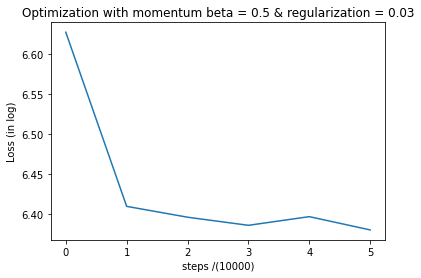

1 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 2.194e+06} |··················································| 0.0%
{cost = 3.867e+05} |>>>>>>>>>>········································| 20.0%
{cost = 3.762e+05} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 4.015e+05} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.895e+05} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 4.008e+05} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

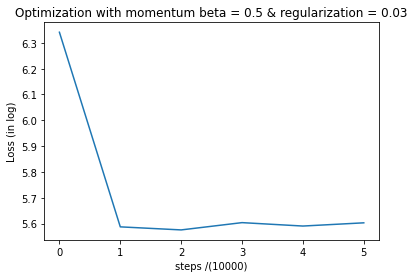

2 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.883e+06} |··················································| 0.0%
{cost = 6.329e+04} |>>>>>>>>>>········································| 20.0%
{cost = 6.313e+04} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 6.125e+04} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 6.279e+04} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 6.066e+04} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

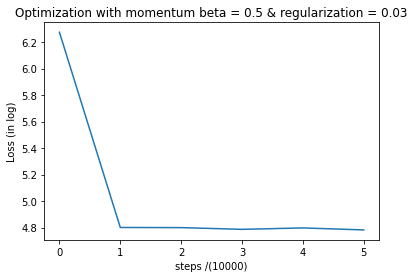

3 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.836e+06} |··················································| 0.0%
{cost = 1.029e+04} |>>>>>>>>>>········································| 20.0%
{cost = 1.008e+04} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.027e+04} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 9.906e+03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.027e+04} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

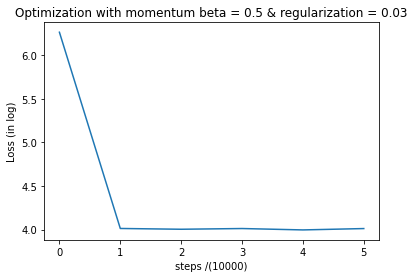

4 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.829e+06} |··················································| 0.0%
{cost = 1.937e+03} |>>>>>>>>>>········································| 20.0%
{cost = 1.854e+03} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.874e+03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.879e+03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.891e+03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

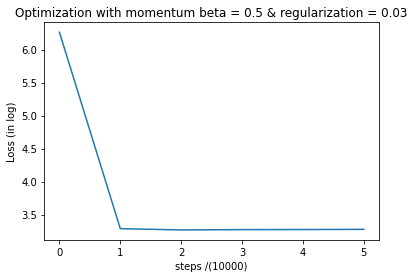

5 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.826e+06} |··················································| 0.0%
{cost = 5.573e+02} |>>>>>>>>>>········································| 20.0%
{cost = 5.411e+02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 5.634e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 5.464e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 5.337e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

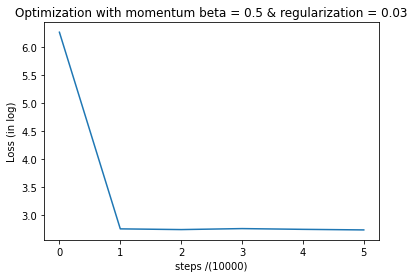

6 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.826e+06} |··················································| 0.0%
{cost = 3.573e+02} |>>>>>>>>>>········································| 20.0%
{cost = 3.504e+02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 3.407e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.461e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.366e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

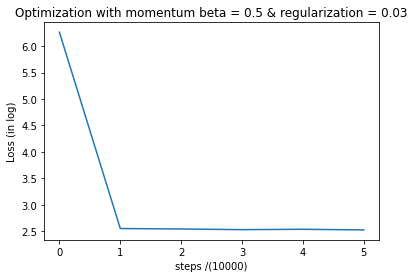

7 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.826e+06} |··················································| 0.0%
{cost = 3.074e+02} |>>>>>>>>>>········································| 20.0%
{cost = 3.021e+02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 3.084e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.069e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.064e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

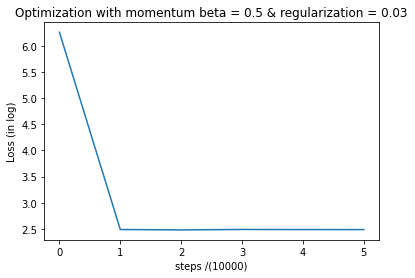

8 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.826e+06} |··················································| 0.0%
{cost = 3.104e+02} |>>>>>>>>>>········································| 20.0%
{cost = 3.147e+02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 3.038e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.101e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.049e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

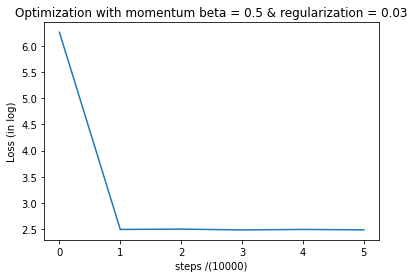

9 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.826e+06} |··················································| 0.0%
{cost = 3.067e+02} |>>>>>>>>>>········································| 20.0%
{cost = 3.068e+02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 3.061e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.040e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 2.980e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

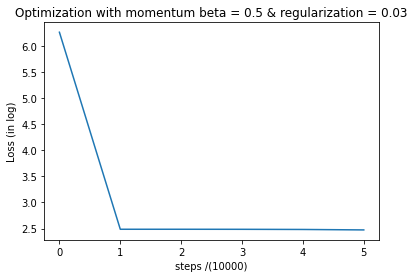

10 / 11
Mini-batch (size 10) Gradient Ascent!

{cost = 1.826e+06} |··················································| 0.0%
{cost = 3.085e+02} |>>>>>>>>>>········································| 20.0%
{cost = 3.001e+02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 3.110e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.048e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.037e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

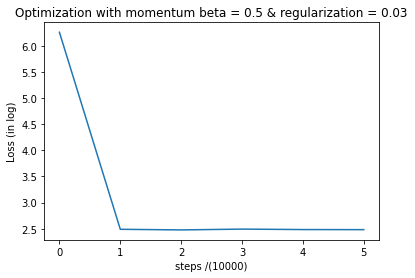

In [6]:
Obj = CS;
time_list = Obj.prop['time_list'];
## start measurement!
Obj.prop['measure'] = [];
Obj.prop['error'] = [];
Obj.prop['recons'] = [];
Obj.prop['recon_coef'] = [];
Obj.prop['accuracy'] = [];

Poisson = True;
phi = Obj.prop['phi'];
psi = Obj.prop['psi'];

#psi = dct_mtx;
#m = psi;
#phi = np.ceil(m / (2 * np.max(abs(m))))[:Obj.prop['cycles'],:];

#psi = psi[:,:n_component]; ## 因为pca只能取样本数和特征数中最小的值

for time in time_list:
    #light_level = Obj.prop['n_photon'] * time / (r*c) / Obj.prop['cycles'];
    light_level = Obj.prop['n_photon'] * time / np.sum(phi);
    


    if Poisson:
        '''
        measure_posi = np.random.poisson(phi.dot(Obj.prop['data'].T) * light_level) / light_level - phi.dot(X_train_mean).reshape(-1,1);
        measure_nega = np.random.poisson((1-phi).dot(Obj.prop['data'].T) * light_level) / light_level - (1-phi).dot(X_train_mean).reshape(-1,1);
        measure = measure_posi -  measure_nega;
        '''
        measure = phi.dot(Obj.prop['data'].T);
        measure = np.random.poisson(phi.dot(Obj.prop['data'].T) * light_level) / light_level;
        measure -= phi.dot(X_train_mean).reshape(-1,1);

    else:
        measure = phi.dot(Obj.prop['data'].T); #注意转置！
        measure -= phi.dot(X_train_mean).reshape(-1,1);


    Obj.prop['measure'].append(measure);

regu = 3e-2; ## 正则化

for time_index in range(len(time_list)):
    print(time_index, '/', len(time_list));
    measure = Obj.prop['measure'][time_index];
    measure = np.array(measure).reshape(measure.shape[0],-1);
    pmt.PMT_reconstruct(r_tot = r, c_tot = c, measurement = measure, 
                        upload_DMD_basis = phi, upload_phi= psi, 
                        user_evaluation = False, learning_rate = 2e-3, 
                        regularization = regu, plot_step= 10000, max_epoch = 50000, display = False); 
                        ## It should be upload_psi，是一个笔误

    Obj.prop['recons'].append(pmt.img_reconstructed_vector + X_train_mean.reshape(-1,1));
    Obj.prop['recon_coef'].append(pmt.W);
    
    this_error = (np.mean((Obj.prop['recons'][-1] - Obj.prop['data'].T)**2));   
    Obj.prop['error'].append(this_error); 

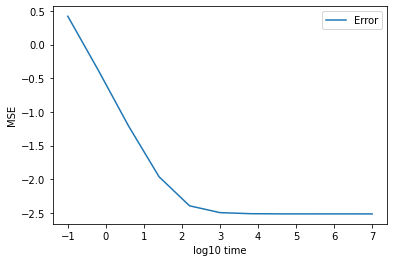

In [7]:
plt.figure(facecolor='w');
plt.plot(log_time_list, np.log10(Obj.prop['error']), label = 'Error');
plt.xlabel('log10 time');
plt.ylabel('MSE')
plt.legend();
plt.show();

In [8]:
## Linear classifier
from sklearn import linear_model;
from sklearn.multiclass import OutputCodeClassifier;
from sklearn.svm import LinearSVC;
Obj.prop['accuracy'] = [];

reg = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0);

reg.fit((X_train - X_train_mean).dot(psi), y_train);

for time_index in range(len((time_list))):
    predictions = reg.predict(Obj.prop['recon_coef'][time_index].T);
    Obj.prop['accuracy'].append(np.mean(predictions == y_test));

In [9]:
print(Obj.prop['accuracy'])

[0.04, 0.04, 0.19, 0.59, 0.89, 0.92, 0.91, 0.93, 0.9, 0.9, 0.92]


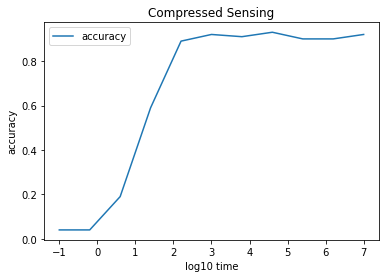

In [10]:
plt.figure(facecolor='w');
plt.plot(log_time_list, Obj.prop['accuracy'], label = 'accuracy');
plt.xlabel("log10 time");
plt.ylabel('accuracy');
plt.title("Compressed Sensing");
plt.ylim
plt.legend();
plt.show();

2. Reconstruction  
 ```Matrix reverse methods```

In [11]:
random_mask = np.round(np.random.rand(r*c, (r*c)));
random_inv = np.linalg.pinv(random_mask);
unit_mask = np.eye((r*c));
unit_inv = unit_mask;
#############################################################
RS = Strategy();

RS.add_item("phi", unit_mask);
RS.add_item("phi_inv", unit_inv);

RS.add_item("cycles", len(CS.prop['phi'][:,0]));


RS.add_item("n_photon", 1e6);
RS.add_item("measure", []);
RS.add_item("recons",[]);
RS.add_item("error", []);
RS.add_item("time_list", time_list);

RS.add_item("data", X_test);

RS.add_item("recon_coef", []);

RS.add_item("accuracy", []);

#########################################################
BS = Strategy();

BS.add_item('phi', random_mask);
BS.add_item('phi_inv', random_inv);

BS.add_item("cycles", len(CS.prop['phi'][:,0]));


BS.add_item("n_photon", 1e6);
BS.add_item("measure", []);
BS.add_item("recons",[]);
BS.add_item("error", []);
BS.add_item("time_list", time_list);

BS.add_item("data", X_test);

BS.add_item("recon_coef", []);

BS.add_item("accuracy", []);

In [12]:
Strategy_list = [RS, BS];

for Obj in Strategy_list:
    #measure
    time_list = Obj.prop['time_list'];
    ## start measurement!
    Obj.prop['measure'] = [];
    Obj.prop['error'] = [];
    Obj.prop['recons'] = [];
    Obj.prop['recon_coef'] = [];
    Obj.prop['accuracy'] = [];

    Poisson = True;
    phi = Obj.prop['phi'];
    phi_inv = Obj.prop['phi_inv']

    for time in time_list:
        light_level = Obj.prop['n_photon'] * time / (r*c) / Obj.prop['cycles'];
        measure = phi.dot(Obj.prop['data'].T); #注意转置！

        if Poisson:
            measure = np.random.poisson(measure * light_level) / light_level;       

        Obj.prop['measure'].append(measure);

    # recon
    for time_index in range(len(time_list)):
        print(time_index, '/', len(time_list));
        measure = Obj.prop['measure'][time_index];
        measure = np.array(measure).reshape(measure.shape[0],-1);

        recons = phi_inv.dot(measure).T;
        Obj.prop['recons'].append(recons);
        Obj.prop['recon_coef'].append((recons - X_train_mean).dot(psi));

    for time_index in range(len((time_list))):
        predictions = reg.predict(Obj.prop['recon_coef'][time_index]);##这里不需要转置，注意看原始数据
        Obj.prop['accuracy'].append(np.mean(predictions == y_test));

    


0 / 11
1 / 11
2 / 11
3 / 11
4 / 11
5 / 11
6 / 11
7 / 11
8 / 11
9 / 11
10 / 11
0 / 11
1 / 11
2 / 11
3 / 11
4 / 11
5 / 11
6 / 11
7 / 11
8 / 11
9 / 11
10 / 11


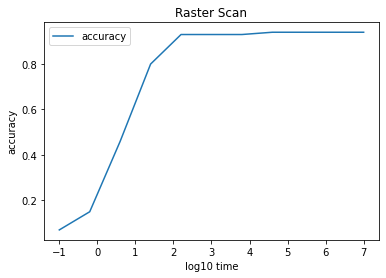

In [13]:
plt.figure(facecolor='w');
plt.plot(log_time_list, RS.prop['accuracy'], label = 'accuracy');
plt.xlabel("log10 time");
plt.ylabel('accuracy');
plt.title("Raster Scan");
plt.legend();
plt.show();

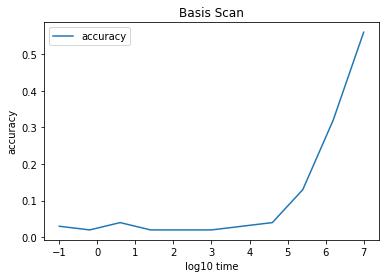

In [14]:
plt.figure(facecolor='w');
plt.plot(log_time_list, BS.prop['accuracy'], label = 'accuracy');
plt.xlabel("log10 time");
plt.ylabel('accuracy');
plt.title("Basis Scan");
plt.legend();
plt.show();

In [15]:
for Obj in [CS, BS, RS]:
    print(Obj.prop['accuracy'])

[0.04, 0.04, 0.19, 0.59, 0.89, 0.92, 0.91, 0.93, 0.9, 0.9, 0.92]
[0.03, 0.02, 0.04, 0.02, 0.02, 0.02, 0.03, 0.04, 0.13, 0.32, 0.56]
[0.07, 0.15, 0.46, 0.8, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 0.94]
